In [6]:
from pymoo.indicators.hv import HV
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
import numpy as np
name = 'RE42'
n_dim = 4
if name.startswith('RE') or name.startswith('VLMOP') or name.startswith('f') :
    pf = np.load(f'Ground_truth_approximate_PF/{name}.npy')
else:
    pf = get_problem(name).pareto_front()

dict_ideal_nadir_points = {
    'RE21' : list([np.array([1237.841423, 0.000276142374915]), np.array([2886.3695604236013, 0.039999999999998245])]),
    'RE32' : list([np.array([0.010205496875, 0.00043904, 0.0]), np.array([37.7831517014, 17561.6, 425062976.628]) ]),
    'RE33' : list([np.array([-0.721525, 1.13907203907, 0.0]), np.array([5.3067, 3.12833430979, 25.0])]),
    'RE36' : list([np.array([7.89473684213e-05, 12.0, 0.0]), np.array([5.931, 56.0, 0.355720675227]) ]),
    'RE37' : list([np.array([0.00889341391106, 0.00488, -0.431499999825]), np.array([0.98949120096, 0.956587924661, 0.987530948586])]),
    'RE41': list([np.array([15.576004, 3.58525, 10.61064375, 0.0]), np.array([39.2905121788, 4.42725, 13.09138125, 9.49401929991])]),
    'RE42':list([np.array([-2756.25909816, 3962.55777262, 1947.88082074, 0.0]), np.array([-844.714092162, 13827.1384409, 5707.50786547, 3207.0456123])])
}

if name.startswith('RE'):
    z_ideal = dict_ideal_nadir_points[name][0]
    z_nadir = dict_ideal_nadir_points[name][1]
    pf = (pf-z_ideal)/(z_nadir- z_ideal)
hv = HV(ref_point=np.ones(n_dim) + 0.1)
true_gt = hv(pf)

In [7]:
def HV_compute(x, hv_max):        
        sol = x
        hv_result = []
        for i in range(sol.shape[0]): 
            hv_result.append(hv(sol[:i])) 
        log_hv = np.log(np.clip(hv_max - hv_result, a_min=1e-14, a_max=hv_max))
        return log_hv,hv_result

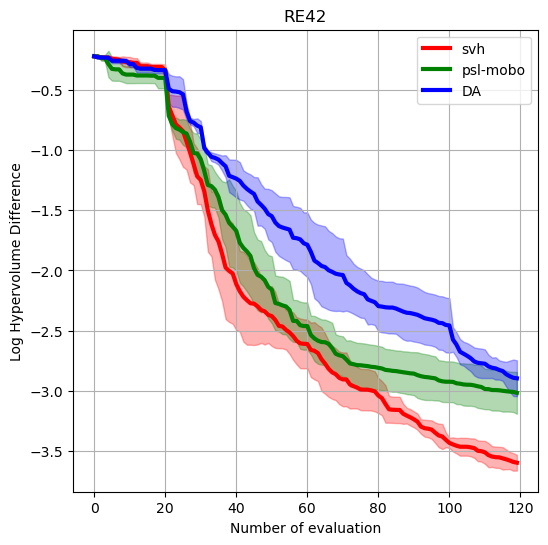

In [ ]:
import numpy as np
svh_data = []
psl_data = []
da_data =[]

# choose evaluation file:
for i in range(5):
    svh_data.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/batch_5/logs_RE42_stein_local_c_1_alpha_0.1_lr_0.001_steps_2000_n_cand400_4_6_batch_sizes_5/evaluation_RE42_Y_6_stein_local_{i}.npy'))
    psl_data.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/PSL_MOBO/batch_5/logs_0.1_RE42_4_6_PSL-MOBO_n_samples_5/evaluation_RE42_Y_6PSL-MOBO_n_samples_5_{i}.npy'))
    da_data.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/DA/logs_0.1_RE42_4_6_nsamples5/evaluation_RE42_Y_6_{i}.npy'))

svh_log_hv_list = []
psl_log_hv_list = []
da_log_hv_list = []


if name.startswith('RE'):
    for i in range(5):
        svh, _ = HV_compute((svh_data[i]-z_ideal)/(z_nadir- z_ideal),true_gt)
        svh_log_hv_list.append(svh)
        psl, _ = HV_compute((psl_data[i]-z_ideal)/(z_nadir- z_ideal),true_gt)
        psl_log_hv_list.append(psl)
        
        da, _ = HV_compute((da_data[i]-z_ideal)/(z_nadir- z_ideal),true_gt)
        da_log_hv_list.append(da)
else:
    for i in range(5):
        svh, _ = HV_compute(svh_data[i],true_gt)
        svh_log_hv_list.append(svh)
        psl, _ = HV_compute(psl_data[i],true_gt)
        psl_log_hv_list.append(psl)
        da, _ = HV_compute(da_data[i],true_gt)
        da_log_hv_list.append(da)
        
svh = np.stack(svh_log_hv_list,axis= 0)
psl = np.stack(psl_log_hv_list,axis= 0)
da = np.stack(da_log_hv_list,axis= 0)


import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

da_mean = np.mean(da, axis=0)
da_var = np.std(da, 0)

svh_mean = np.mean(svh, axis=0)
svh_var = np.std(svh, 0)

psl_mean = np.mean(psl, axis=0)
psl_var = np.std(psl, 0)

                    
# Plotting the lines with shaded areas using fill_between

plt.plot(range(len(svh_mean)), svh_mean, color='red',linewidth=3, label='svh')
plt.fill_between(range(len(svh_mean)), svh_mean - svh_var, svh_mean + svh_var, color='red', alpha=0.3)

plt.plot(range(len(psl_mean)), psl_mean, color='green', linewidth=3,label='psl-mobo')
plt.fill_between(range(len(psl_mean)), psl_mean - psl_var, psl_mean + psl_var, color='green', alpha=0.3)

plt.plot(range(len(da_mean)), da_mean, color='b', linewidth=3,label='DA')
plt.fill_between(range(len(da_mean)), da_mean - da_var, da_mean + da_var, color='b', alpha=0.3)


plt.title(f'{name.upper()}')
plt.xlabel('Number of evaluation')
plt.ylabel('Log Hypervolume Difference')
plt.grid()
plt.legend()
# plt.savefig(f"visualization_plot/{name}_diff_prior.pdf", bbox_inches='tight')
plt.show()

### Ablation study: ZDT1

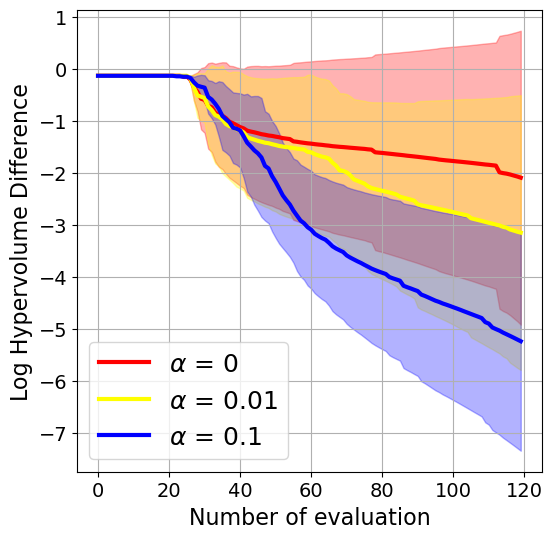

In [6]:
import numpy as np
a_0, a_1, a_2, a_3, a_4, a_5 = [], [],[],[],[],[]

# choose evaluation file:
for i in range(5):
    a_0.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_0_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy'))
    a_1.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_0.01_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy'))
    a_2.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_0.1_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy'))
    a_3.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_1_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy'))
    a_4.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_5_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy'))
    a_5.append(np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_10_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy'))
a_0_log_hv_list = []
a_1_log_hv_list = []
a_2_log_hv_list = []
a_3_log_hv_list = []
a_4_log_hv_list = []
a_5_log_hv_list = []

# da_log_hv_list = []



for i in range(5):
    a_0_, _ = HV_compute(a_0[i],true_gt)
    a_0_log_hv_list.append(a_0_)
    a_1_, _ = HV_compute(a_1[i],true_gt)
    a_1_log_hv_list.append(a_1_)
    a_2_, _ = HV_compute(a_2[i],true_gt)
    a_2_log_hv_list.append(a_2_)
    a_3_, _ = HV_compute(a_3[i],true_gt)
    a_3_log_hv_list.append(a_3_)
    a_4_, _ = HV_compute(a_4[i],true_gt)
    a_4_log_hv_list.append(a_4_)
    a_5_, _ = HV_compute(a_5[i],true_gt)
    a_5_log_hv_list.append(a_5_)
    

a_0 = np.stack(a_0_log_hv_list,axis= 0)
a_1 = np.stack(a_1_log_hv_list,axis= 0)
a_2 = np.stack(a_2_log_hv_list,axis= 0)
a_3 = np.stack(a_3_log_hv_list,axis= 0)
a_4 = np.stack(a_4_log_hv_list,axis= 0)
a_5 = np.stack(a_5_log_hv_list,axis= 0)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))


a_0_mean = np.mean(a_0, axis=0)
a_0_var = np.std(a_0, 0)
a_1_mean = np.mean(a_1, axis=0)
a_1_var = np.std(a_1, 0)
a_2_mean = np.mean(a_2, axis=0)
a_2_var = np.std(a_2, 0)
a_3_mean = np.mean(a_3, axis=0)
a_3_var = np.std(a_3, 0)
a_4_mean = np.mean(a_4, axis=0)
a_4_var = np.std(a_4, 0)
a_5_mean = np.mean(a_5, axis=0)
a_5_var = np.std(a_5, 0)


plt.rcParams.update({
    'font.size': 20,           # Default font size
    'axes.titlesize': 20,      # Title font size
    'axes.labelsize': 16,      # X and Y label font size
    'xtick.labelsize': 14,     # X-axis tick label size
    'ytick.labelsize': 14,     # Y-axis tick label size
    'legend.fontsize': 18      # Legend font size
})
                    
# Plotting the lines with shaded areas using fill_between

plt.plot(range(len(a_0_mean)), a_0_mean, color='red',linewidth=3, label=r'$\alpha$ = 0')
plt.fill_between(range(len(a_0_mean)), a_0_mean - a_0_var, a_0_mean + a_0_var, color='red', alpha=0.3)

plt.plot(range(len(a_1_mean)), a_1_mean, color='yellow',linewidth=3, label=r'$\alpha$ = 0.01')
plt.fill_between(range(len(a_1_mean)), a_1_mean - a_1_var, a_1_mean + a_1_var, color='yellow', alpha=0.3)

plt.plot(range(len(a_2_mean)), a_2_mean, color='blue',linewidth=3, label=r'$\alpha$ = 0.1')
plt.fill_between(range(len(a_2_mean)), a_2_mean - a_2_var, a_2_mean + a_2_var, color='blue', alpha=0.3)

# plt.plot(range(len(a_3_mean)), a_3_mean, color='green',linewidth=3, label=r'$\alpha$ = 1')
# plt.fill_between(range(len(a_3_mean)), a_3_mean - a_3_var, a_3_mean + a_3_var, color='green', alpha=0.3)

# plt.plot(range(len(a_4_mean)), a_4_mean, color='black',linewidth=3, label=r'$\alpha$ = 5')
# plt.fill_between(range(len(a_4_mean)), a_4_mean - a_4_var, a_4_mean + a_4_var, color='black', alpha=0.3)


# plt.plot(range(len(a_5_mean)), a_5_mean, color='brown',linewidth=3, label=r'$\alpha$ = 10')
# plt.fill_between(range(len(a_5_mean)), a_5_mean - a_5_var, a_5_mean + a_5_var, color='brown', alpha=0.3)




# plt.title(f'{name.upper()}')
plt.xlabel('Number of evaluation')
plt.ylabel('Log Hypervolume Difference')
plt.grid()
plt.legend(loc='lower left')
plt.savefig(f"visualization_plot/zdt1_small_alpha.pdf", bbox_inches='tight')
plt.show()

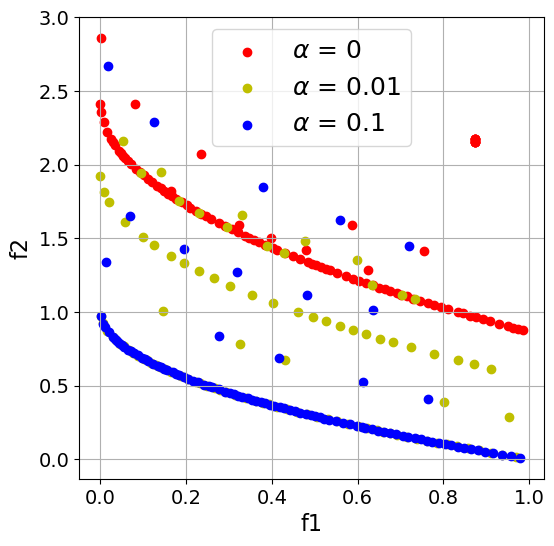

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
# from pymoo.problems import get_problem
from pymoo.util.plotting import plot
i=1
plt.rcParams.update({
    'font.size': 20,           # Default font size
    'axes.titlesize': 20,      # Title font size
    'axes.labelsize': 16,      # X and Y label font size
    'xtick.labelsize': 14,     # X-axis tick label size
    'ytick.labelsize': 14,     # Y-axis tick label size
    'legend.fontsize': 18      # Legend font size
})
a_0 = np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_0_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy')
a_1 = np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_0.01_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy')
a_2  =np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_0.1_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy')
a_3  =np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_1_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy')
a_4  = np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_5_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy')
a_5 = np.load(f'/home/ubuntu/duc.nm195858/SVH-PSL/result/SVH_PSL/ablation/batch_5/logs_zdt1_stein_local_c_1_alpha_10_lr_0.001_steps_500_n_cand1000_2_20_batch_sizes_5/evaluation_zdt1_Y_20_stein_local_{i}.npy')

plt.figure(figsize=(6, 6))  # Optional: specify the figure size
j= 16
# plt.scatter(psl[j][:,0], psl[j][:,1], label='PSL-MOBO',s=65, color='g', marker='o')
plt.scatter(a_0[20:,0], a_0[20:,1], label=r'$\alpha$ = 0', color='r', marker='o')
plt.scatter(a_1[20:,0], a_1[20:,1], label=r'$\alpha$ = 0.01', color='y', marker='o')
plt.scatter(a_2[20:,0], a_2[20:,1], label=r'$\alpha$ = 0.1', color='blue', marker='o')
# plt.scatter(a_3[20:,0], a_3[20:,1], label=r'$\alpha$ = 1', color='green', marker='o')
# plt.scatter(a_4[20:,0], a_4[20:,1], label=r'$\alpha$ = 5', color='black', marker='o')
# plt.scatter(a_5[20:,0], a_5[20:,1], label=r'$\alpha$ = 10', color='brown', marker='o')

plt.xlabel('f1')
plt.ylabel('f2')

# Add a grid
plt.grid(True)


# Add a legend
plt.legend()
plt.savefig(f"visualization_plot/zdt1_pf_small_alpha.pdf", bbox_inches='tight')

# Display the plot
plt.show()